In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Limpieza del dataset

In [41]:
df=pd.read_csv("data/measurements.csv")

In [42]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [43]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [44]:
# Cambiar a numérico y las "," por "."
df["distance"] = df['distance'].str.replace(',','.').astype(float)
df["consume"] = df['consume'].str.replace(',','.').astype(float)
df["temp_inside"] = df['temp_inside'].str.replace(',','.').astype(float)
df["refill liters"] = df['refill liters'].str.replace(',','.').astype(float)

In [45]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [46]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [47]:
# Eliminar la columna specials, refill liters y refill gas porque hay muchos nulos
df=df.drop(columns=["specials", "refill liters", "refill gas"])

In [48]:
# Ver valores de temp_inside porque contiene algún nulo
df["temp_inside"].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [49]:
# temp_inside tiene 12 nulos, hago la media de las temperaturas y reemplazo los nulos con la media
df["temp_inside"].mean()

21.929521276595743

In [50]:
df["temp_inside"].fillna(value=21.9, inplace=True)

In [51]:
df["temp_inside"].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
21.9     12
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [52]:
# Correlaciones entre las columnas
matrix=df.corr()
matrix

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075361,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.160261,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059355,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.075361,-0.160261,0.059355,1.000000,0.359422,0.297638,-0.036824,0.242242
temp_outside,0.088175,-0.320811,0.015411,0.359422,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.297638,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.036824,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.242242,0.346903,0.088598,-0.112650,1.000000


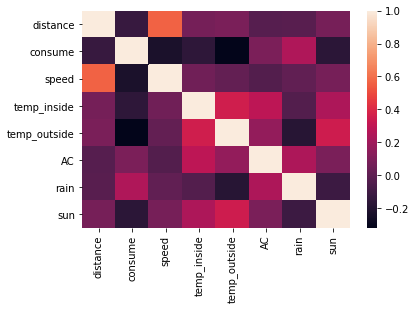

In [53]:
sns.heatmap(matrix)
# No hay mucha correlacion entre las variables

# 2. Visualización y relación entre los datos

Visualizaciones para entender como afecta cada una de las variables al consumo del coche

In [54]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


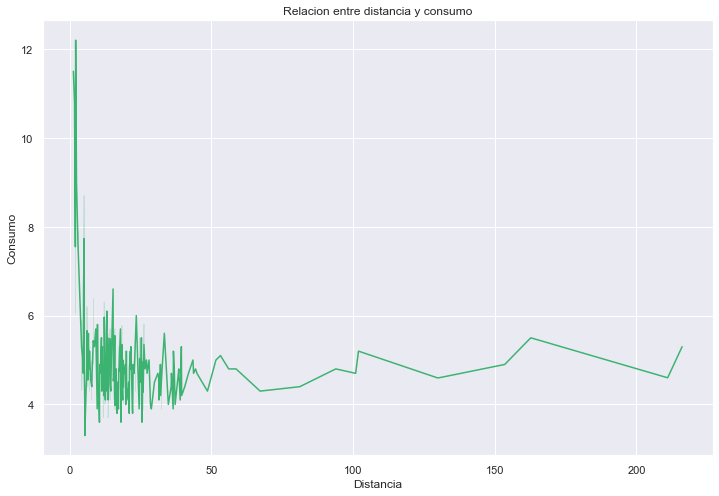

In [86]:
# Visualización distance y consume
sns.set()
width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.lineplot(x="distance", y="consume", data=df, color="mediumseagreen")

plt.title("Relacion entre distancia y consumo")
plt.xlabel("Distancia")
plt.ylabel("Consumo")

plt.show()
# Consume más cuántos menos km hace y luego se queda constante

<Figure size 864x576 with 0 Axes>

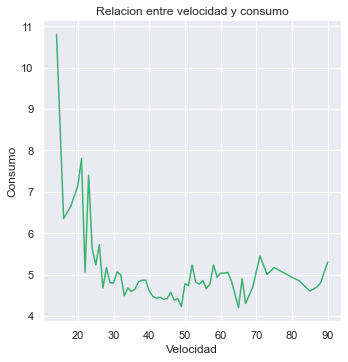

In [87]:
# Visualización consume y speed

width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.relplot(x="speed", y="consume", ci=None, kind="line", data=df, color="mediumseagreen")

plt.title("Relacion entre velocidad y consumo")
plt.xlabel("Velocidad")
plt.ylabel("Consumo")

plt.show()
# Cuánta más velocidad menor es el consumo

<Figure size 864x576 with 0 Axes>

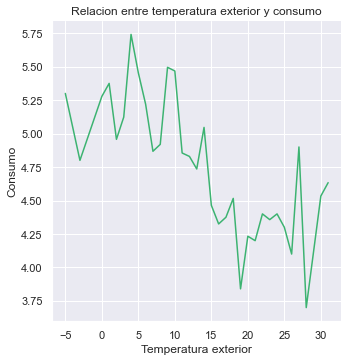

In [88]:
# Visualización temp_outside y consume
width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.relplot(x="temp_outside", y="consume", ci=None, kind="line", data=df, color="mediumseagreen")

plt.title("Relacion entre temperatura exterior y consumo")
plt.xlabel("Temperatura exterior")
plt.ylabel("Consumo")

plt.show()
# El consumo es mayor cuánto más frío hace en el exterior

<Figure size 864x576 with 0 Axes>

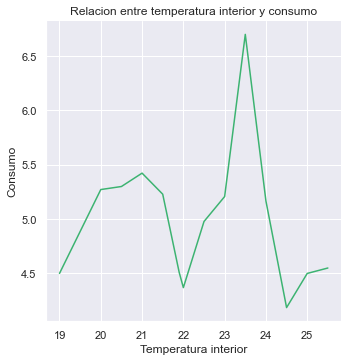

In [97]:
# Visualización temp_inside y consume
width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.relplot(x="temp_inside", y="consume", ci=None, kind="line", data=df, color="mediumseagreen")

plt.title("Relacion entre temperatura interior y consumo")
plt.xlabel("Temperatura interior")
plt.ylabel("Consumo")

plt.show()
# EL consumo es mayor cuando la temperatura está en torno a los 23,5 grados

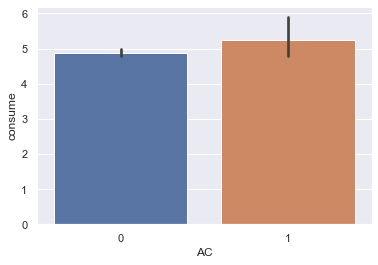

In [90]:
# Visualización AC y consume
sns.barplot(x="AC", y="consume", data=df);
# Con el AC el consumo es ligeramente superior

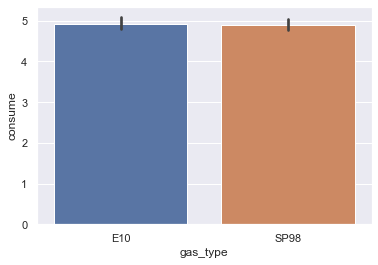

In [91]:
# Visualización gas_type y consume
sns.barplot(x="gas_type", y="consume", data=df);
# Se consume con los dos combustibles lo mismo

In [92]:
# Saber con qué combustible hay un mayor consumo
# Distancia máxima recorrida con E10
distE10=df.loc[df["gas_type"]=="E10", "distance"]
distE10.max()

130.3

In [93]:
# Distancia máxima recorrida con SP98
distSP98=df.loc[df["gas_type"]=="SP98", "distance"]
distSP98.max()

216.1

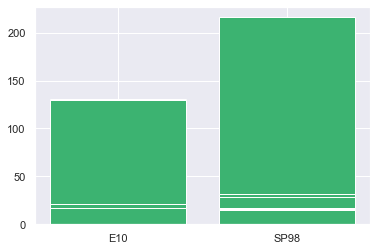

In [96]:
heigh=df["gas_type"]
bars=df["distance"]
plt.bar(heigh, bars, data=df, color="mediumseagreen");

In [ ]:
# Se recorre mucho más con SP98, por tanto se consume más rápido E10

In [144]:
df.to_csv('data/measurements_clean.csv', index=False)